<a href="https://colab.research.google.com/github/bhagirathbhard/Netflix-Content-Analysis/blob/nightly/A7-Netflix-Content-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<a id="Content" style="color:#023e8a;">Table of Contents</a>**

* [**<span style="color:#023e8a;">1. Project Overview</span>**](#Project-Overview) 
* [**<span style="color:#023e8a;">2. Data Sources</span>**](#Data-Sources)
* [**<span style="color:#023e8a;">3. Data Import and EDA</span>**](#Data-Import)
* [**<span style="color:#023e8a;">4. EDA</span>**](#EDA)
* [**<span style="color:#023e8a;">5. Data Cleanup</span>**](#Data-Cleanup)
* [**<span style="color:#023e8a;">6. Key Questions Answered</span>**](#Questions)
* [**<span style="color:#023e8a;">7. Conclusion</span>**](#Conclusion)
* [**<span style="color:#023e8a;">8. References</span>**](#References)

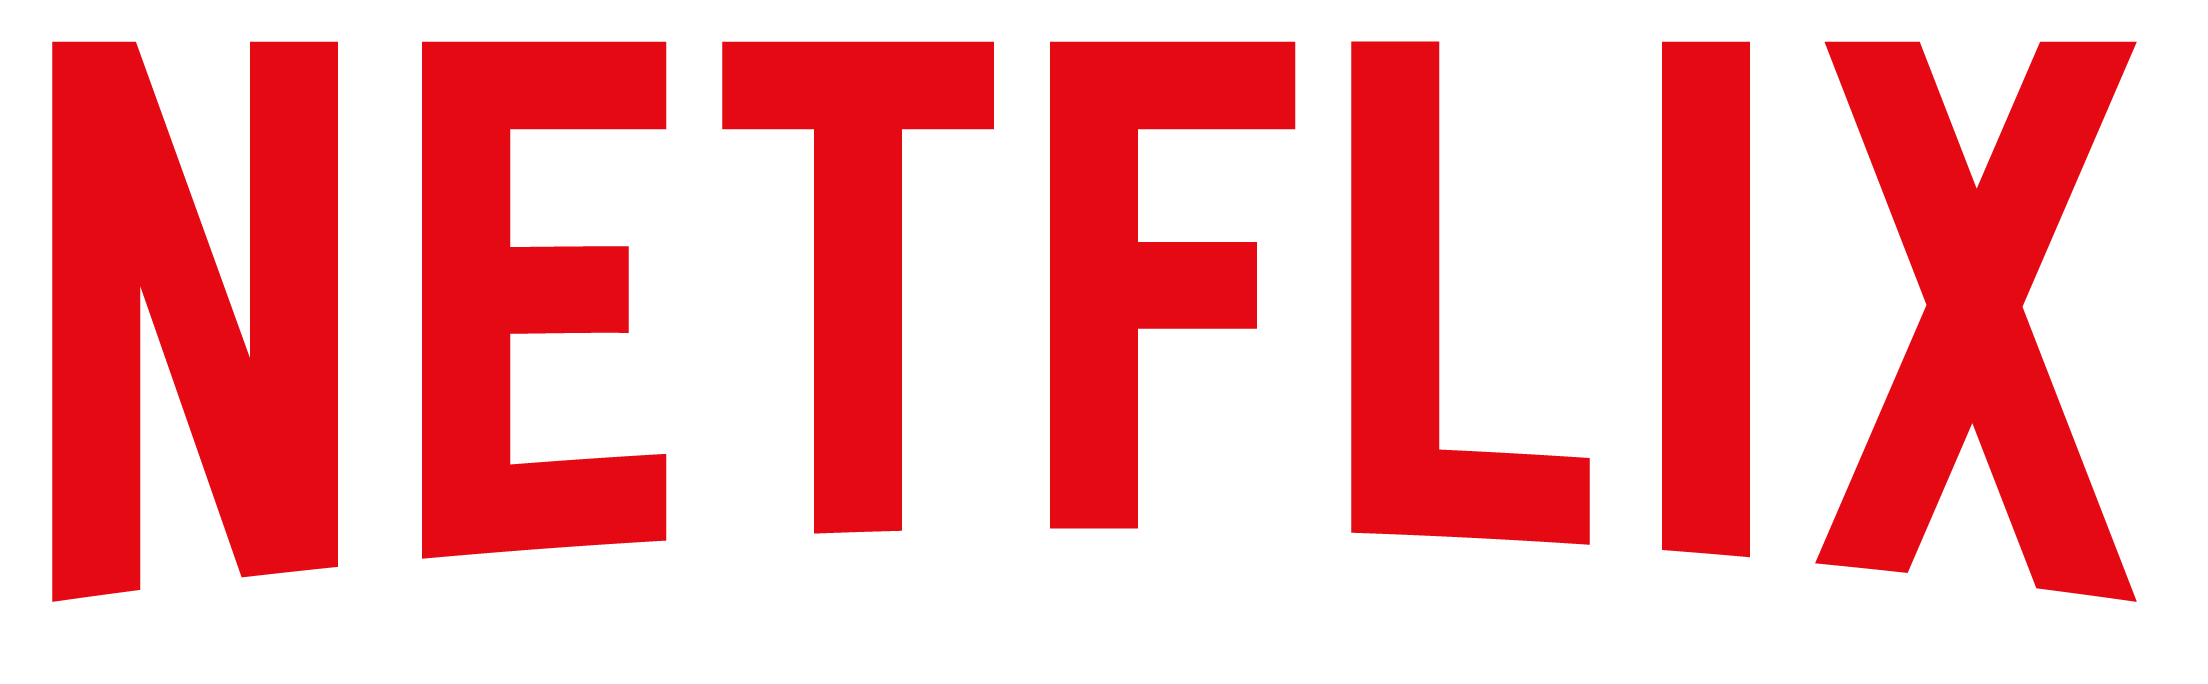

# **<span style="color:#023e8a;font-size:200%"><center>Analysis of Netflix Content Library</center></span>**

## <center>Bhagirath Bhardwaj, Jinisha Kande, Paulin Jesintha Mariadoss, Renata Halim, Sohil Jain, and Sonal Kaur</center>

# **<span id="Project-Overview" style="color:#023e8a;">Project and Dataset Overview</span>**

**Netflix Content Analysis**

Netflix is the pioneer of internet media and entertainment streaming. Over the years it has faced several challenges and also overcome a shift in demographics, changing viewership styles and choices.

Netflix’s content library and their recommendations engine play a big role in influencing the content consumed by people worldwide. Research from Netflix shares that over 80% of the content watched on their platform came from
their recommendations engine. 

As Netflix has over 100 million users worldwide, it becomes crucial for Netflix to implement a strong data-driven algorithm to recommend customized movies and TV shows to its audience.

The following project is interested in studying the changes in Netflix’s content strategy over the years. We are curious to know if or to what extent these changes resulted from cultural and target audience changes in Netflix's subscriber base.

*   Perform Exploratory Data Analysis, Data cleanup on the dataset using Python.
*   Analyze variables in our dataset such as actors, genres, directors, ratings etc.
*  Find answers to key questions and trends around Netflix’s investment into various kinds of media content.


**Tip! Use the Table of Contents to browse the notebook**

# **<span id="Data-Sources" style="color:#023e8a;">Data Sources</span>**
---

Our dataset was captured using a combination of tools and methods; scraping, API calls, and manual validation. Using these techniques, the author of the original dataset, Shivam Bansal, was able to capture information on a myriad of topics, namely on Netflix shows, movie titles, directors, casts, countries, release dates, ratings, and more. In total, our dataset has `12` columns and `8807` rows.

*   [Netflix-Shows by Shivam Bansal](https://www.kaggle.com/datasets/shivamb/netflix-shows)
*  [Clarification of Source of dataset by Author](https://twitter.com/shivamshaz/status/1452642649442172931?s=20&t=OSh8EM8VNMZhmXSi6aBgtA)

* [Scraped Data - Netflix Original Programming](https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming)


## **Dataset Description**

In this project we utlize multiple datasets, a brief summary of all of them are as follows:

| Table/Dataset Name     | Brief Description | Characteristic, Data type|
| ----------- | ----------- |-------- |
| `netflix_ds` | Dataset containing a list of all tv shows and movies hosted on Netflix over the years.       |    Some data cleanup necessary.      |
| `netflix_originals_drama_ds`   | Dataset scraped from Wikipedia for all **Drama** Genre Shows **produced** by Netflix as a "Netflix Originals".        |  The reason we looked into this data is because of Netflix's recent success and weightage on this genre.        |


**I. netflix_ds**

| Column      | Brief Description |  Characteristic, Data type   | 
| ----------- | ----------- | ------- |
| `show_id`      | Unique `IDs` of each Movie and TV Show. Follows the syntax of `Sn` where `n` is the sr. number. (e.g. `S432`)      |  String, Unique, Primary Key, Not Null       |
| `type`   | Catagorical Variable defining if the row is for a `Movie` or `TV Show`        |   String, Not Null     |
| `title` | Title of the Movie or TV Show    | String, Not Null  |
| `director` |  Name of the Director of the Movie or TV Show   |    String    |
| `cast`     |  List of names of the Cast     |     String    |
| `country`   |    Country where the movie / show was produced    |     String   |
| `date_added`   |   Date it was added on Netflix   | Date Format     |
| `release_year`  |   Actual Release year of the move / show    |    Date Format |
| `rating`     |   TV Rating of the movie / show       |  Date Format    |
| `duration` |  Total Duration - in minutes or number of seasons| String  | 
| `listed_in` |   List of Genres under which the content was hosted by Netflix     |  String | 
| `description` |  The summary description     |  String   |
| `duration_min` | Derived from `duration` column, it lists the mins in int64 format for easy analysis. | Integer |
| `seasons` | Derived from `duration` column, it lists the seasons in int64 format for easy analysis | Integer |


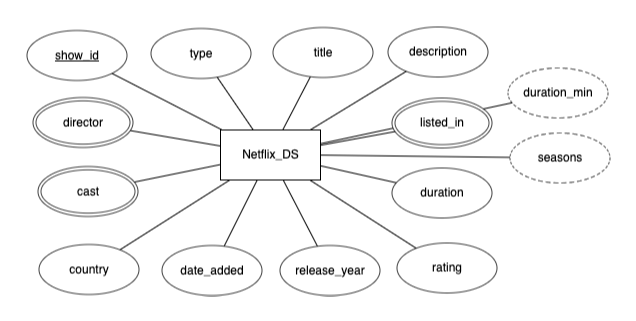

**II. netflix_originals_drama_ds**

| Column      | Brief Description |  Characteristic, Data type   | 
| ----------- | ----------- | ------- |
| `title`      | Title of the TV Show      |  String, Unique, Primary Key, Not Null       |
| `Genre`   | Specific Genre under the Drama Category of Netflix        |   String, Not Null     |
| `Premiere` | Date of Premiere of the TV Show   | Date Format  |
| `Finale` |  Date of the Finale of the TV Show   |    Date Format    |
| `Seasons` | Seasons and Episodes of the TV Show | String |
| `Runtime` | Duration | String |
| `Seasons_Only` | Manually split from `Seasons` column to only contain Seasons length | String |
| `Episodes` | Manually split from `Seasons` column to only contain total episodes | String |

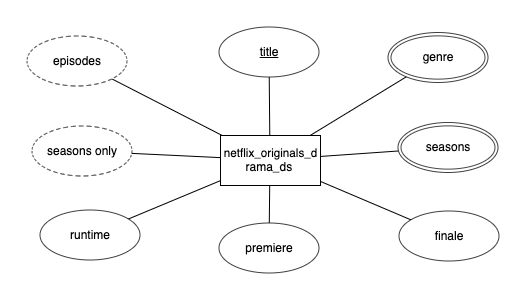

# **<span id="Data-Cleanup" style="color:#023e8a;">Data Import</span>**
---

In [ ]:
#Import Google Drive
#from google.colab import drive
#Import OS for file management
import os
#Import Pandas for data manipulation
import pandas as pd
#Import Matplotlib for data visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')
#Import numpy for data manipulation
import numpy as np
#Import seaborn for data visualization
import seaborn as sns
#Inline plotting
%matplotlib inline

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!cd gdrive/Shareddrives/BA780/.kaggle/

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "gdrive/Shareddrives/BA780/.kaggle/"

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Fixing permissions, Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.
! chmod 600 gdrive/Shareddrives/BA780/.kaggle/kaggle.json

In [ ]:
#Load dataset
!kaggle datasets download -d shivamb/netflix-shows --force

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 138MB/s]


In [ ]:
!unzip netflix-shows.zip

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
netflix_ds = pd.read_csv('/Users/bhagirathbhardwaj/Library/CloudStorage/GoogleDrive-bbhardw@bu.edu/Shared drives/BA780/netflix_titles.csv')
#netflix_ds = pd.read_csv('netflix_titles.csv')

# **<span id="EDA" style="color:#023e8a;">Exploratory Data Analysis </span>**
---

In [ ]:
#Check basic data-set rows
netflix_ds.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#Check dataset shape
netflix_ds.shape

(8807, 12)

In [ ]:
#Check Dataset info
netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_ds.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **<span id="Data-Cleanup" style="color:#023e8a;">Data Cleanup</span>**
---



## **Handling null data**

In [ ]:
#Check Null Values per column
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We see that the columns `director`, `cast`, `country`,`date_added`,`rating`, and `duration` all have null values. We can decide how to manage them through 

*  Manual validation
*  Imputation with generic values
*  Dropping null values entirely.


Starting with `manual validation` on the `rating` column -

In [ ]:
#Rating Distribution
netflix_ds["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#Rating has duration (74 mins, 84 etc. needs to be cleaned and replaced)
netflix_ds[netflix_ds["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| Louis C.K. 2017      | TV-MA       |
| Louis C.K.: Hilarious   | TV-MA        |
| Louis C.K.: Live at the Comedy Store | TV-MA |

In [ ]:
#Replacing the ratings from NaN
netflix_ds["rating"].replace(["74 min","84 min","66 min"], "TV-MA", inplace= True)

In [ ]:
netflix_ds[netflix_ds["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| 13TH: A Conversation with Oprah Winfrey & Ava DuVernay| TV-PG |
| Gargantia on the Verdurous Planet      | TV-14       |
| Little Lunch	   | TV-MA        |
| My Honor Was Loyalty	 | PG-13 |

In [ ]:
#Find location of the Movies and Shows and replace their ratings
netflix_ds[netflix_ds["title"] == "Little Lunch"] = netflix_ds[netflix_ds["title"] == "Little Lunch"].replace(np.nan, "TV-MA")
netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"] = netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"].replace(np.nan, "TV-PG")
netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"] = netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"].replace(np.nan, "TV-14")
netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"] = netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"].replace(np.nan, "PG-13")

In [ ]:
netflix_ds["rating"].value_counts(ascending=False)

TV-MA       3211
TV-14       2161
TV-PG        864
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

`rating` column is now cleaned up, we then move on to `Imputation with generic values` for the `director`, `country`, and `cast` column.

In [ ]:
#Replacing and filling in director, cast, and country null values -
netflix_ds.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)
pd.isnull(netflix_ds).sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

We choose to further use `manual validation` on missing data of the `duration` column -

In [ ]:
#Checking the missing 3 durations
netflix_ds[netflix_ds['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#Find location of the Movies and Shows and replace their duration from `NaN`.
#Data sourced from IMDB
netflix_ds[netflix_ds["title"] == "Louis C.K. 2017"] = netflix_ds[netflix_ds["title"] == "Louis C.K. 2017"].replace(np.nan, "74 mins")
netflix_ds[netflix_ds["title"] == "Louis C.K.: Hilarious"] = netflix_ds[netflix_ds["title"] == "Louis C.K.: Hilarious"].replace(np.nan, "84 mins")
netflix_ds[netflix_ds["title"] == "Louis C.K.: Live at the Comedy Store"] = netflix_ds[netflix_ds["title"] == "Louis C.K.: Live at the Comedy Store"].replace(np.nan, "66 mins")

In [ ]:
pd.isnull(netflix_ds).sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

As there is ambiguity around exact `date_added`, we choose to use the last method of `Dropping null values entirely` and drop the last 10 null values.

In [ ]:
#Dropping remaining null values
netflix_ds = netflix_ds.dropna()

In [ ]:
pd.isnull(netflix_ds).sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **Handling duplicate data**


In [ ]:
#Checking the data-set for any duplicates
netflix_ds.duplicated().sum()

0

We see that there are no duplicate rows in the dataset.

## **Addressing Column Data Types**

In [ ]:
#Data Type of dataset
netflix_ds.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

We see that the dataset is a mix of `object`, `int64` datatypes at the moment. However, we want to change this to the appropriate datatypes as per the description and content of each of the columns. 

We further analyze the dataset unique values per column to identify if they are catagorical, numerical, etc.

In [ ]:
#Unique values in each column
netflix_ds.nunique().sort_values(ascending=False)

show_id         8797
title           8797
description     8765
cast            7683
director        4532
date_added      1767
country          750
listed_in        513
duration         223
release_year      74
rating            14
type               2
dtype: int64

The dataset seems to be quite rich per each column with a lot of catagorical information to work with. We notice there are columns that clearly are `datetime64` format. 

We choose to update them so we are able to analyze it further later on -

In [ ]:
#Convert Date Added column and Release Year to datetime
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'])
netflix_ds['release_year'] = pd.to_datetime(netflix_ds['release_year'], format='%Y')

In our review of the `object` data type, we found the following snippet from the documentation -


> Finally, arbitrary objects may be stored using the object dtype, but should be avoided to the extent possible (for performance and interoperability with other libraries and methods. See object conversion).

[Source Pandas Documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes)



In [ ]:
#Using Convert dtypes
netflix_ds = netflix_ds.convert_dtypes()

We use `convert_dtypes` to convert the `object` data type to the appropriate data type. We also used `astype` to convert the `date_added` column to `datetime64` format. Doing so, we are able to analyze the data further later on. Documentation for `convert_dtypes` can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html) and for `astype` can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

In [ ]:
netflix_ds.dtypes

show_id                 string
type                    string
title                   string
director                string
cast                    string
country                 string
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  string
duration                string
listed_in               string
description             string
dtype: object

## **Creating new columns**

We use regex to extract the `duration_min` for movies where it is in `min` and then the `seasons` where it is in `seasons`.

In [ ]:
#Create a new column `duration_min` to store the duration in minutes for easier analysis
netflix_ds['duration_min'] = netflix_ds['duration'].str.extract('(\d+) min').astype(str)
#Create a new column `seasons` by extracting the number of seasons from the `duration` column
netflix_ds['seasons'] = netflix_ds['duration'].str.extract('(\d+) Seasons').astype(str)
netflix_ds['seasons'] = netflix_ds['duration'].str.extract('(\d+) Season').astype(str)

In [ ]:
#Replace the <NA> values with 0 in the `seasons` column
netflix_ds['seasons'] = netflix_ds['seasons'].replace('<NA>', '0')
#Replace the <NA> values with 0 in the `duration_min` column
netflix_ds['duration_min'] = netflix_ds['duration_min'].replace('<NA>', '0')
#Convert all values in seasons column to float
netflix_ds['seasons'] = netflix_ds['seasons'].astype(int)
#Convert all values in duration_min column to float
netflix_ds['duration_min'] = netflix_ds['duration_min'].astype(int)


In [ ]:
#Using Convert dtypes
netflix_ds = netflix_ds.convert_dtypes()
netflix_ds.dtypes

show_id                 string
type                    string
title                   string
director                string
cast                    string
country                 string
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  string
duration                string
listed_in               string
description             string
duration_min             Int64
seasons                  Int64
dtype: object

In [ ]:
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0
1,s2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1
3,s4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,1
4,s5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,2


We now have two new columns `duration_min` and `seasons`. That each independently store either the duration of the movie in minutes or the number of seasons of the TV show. We subsequently convert the `duration_min` column to `int64` format for further analysis. We chose to separate the `duration` column into two columns as it is easier to analyze and visualize the data.

# **<span id="Questions" style="color:#023e8a;">Key Questions Answered</span>**

In the following section we will review the dataset, answer the questions we set out to answer, and provide visualizations to support our findings. We will also provide a summary of our findings and recommendations in the end.

# **Phase 1**

We first start by drawing out a big picture overview on the whole dataset. We import `plotly` library to create an interactive chart that is able to show the big picture of the dataset. Documentation for `plotly.express` can be found [here](https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html).

## Big Picture Overview Netflix’s content strategy over the years

In [ ]:
#installing dependency for plotly
!pip install plotly

In [ ]:
#Create plot that can be hovered over
import plotly.express as px
#set background color to black
px.defaults.template = "plotly_dark"

#Create a plotly figure
fig = px.scatter(netflix_ds, x="release_year", y="duration_min", color="rating", hover_name="title", size_max=50)
#Set title
fig.update_layout(title_text='Netflix Content Analysis - Duration vs Release Year (Movies Only) (hover over to see title)')
#Set x-axis title
fig.update_xaxes(title_text='Release Year')
#Set y-axis title
fig.update_yaxes(title_text='Duration (Minutes)')
#Show plot
fig.show()

## What are the top 20 durations of Movies/TV Shows?

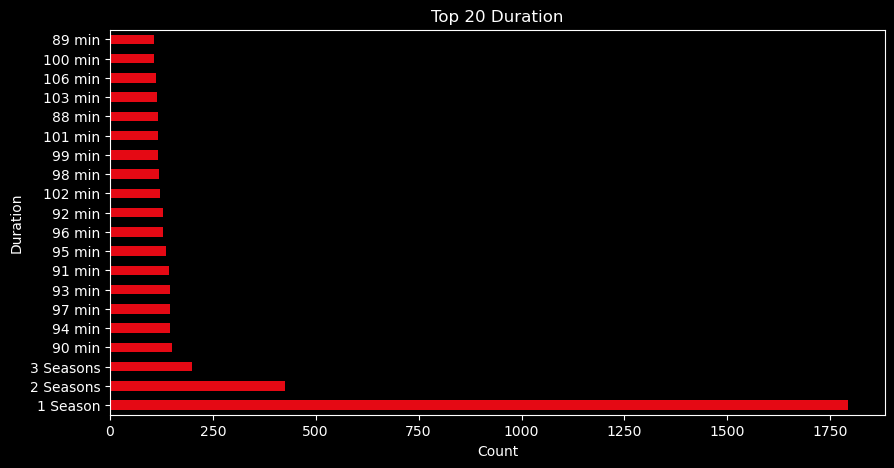

In [ ]:
#Ensuring Matplotlib style is set to dark
import matplotlib.style as style
style.use('dark_background')  

#Plot top 20 duration column color code by rating
netflix_ds['duration'].value_counts().head(20).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Top 20 Duration')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

It could also be interesting to assess if there are any specific days on which Netflix prefers to add their content.

## Average Season Length for TV Shows

In [ ]:
#Remove NaN from duration
netflix_ds['duration'].replace('NaN', '0 min', inplace=True)

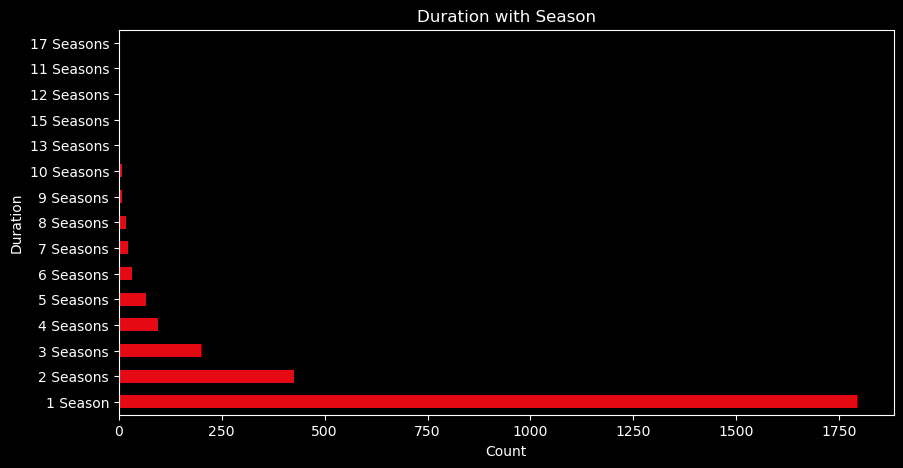

In [ ]:
#Plot value from duration column that includes the word season
netflix_ds[netflix_ds['duration'].str.contains('Season',na=False)]['duration'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Duration with Season')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

## Growth of Drama TV Shows **produced** by Netflix

Because the original dataset does not include information of Producers, we use python libraries `beautifulsoup4` , `requests` to parse information from the Wikipedia page.

In [ ]:
#Installing beautifulsoup4 for web scraping
!pip install beautifulsoup4

In [ ]:
#Importing BeautifulSoup and requests
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [ ]:
# Get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code) #200 means OK

200


In [ ]:
# Parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
netflix_originals_drama_table=soup.find('table',{'class':"wikitable"})

In [ ]:
netflix_originals_drama_ds=pd.read_html(str(netflix_originals_drama_table))
# convert list to dataframe
netflix_originals_drama_ds=pd.DataFrame(netflix_originals_drama_ds[0])
print(netflix_originals_drama_ds.head())

                     Title             Genre           Premiere  \
0           House of Cards   Political drama   February 1, 2013   
1            Hemlock Grove   Horror/thriller     April 19, 2013   
2  Orange Is the New Black      Comedy drama      July 11, 2013   
3               Marco Polo  Historical drama  December 12, 2014   
4                Bloodline          Thriller     March 20, 2015   

             Finale                 Seasons    Runtime   Notes  
0  November 2, 2018  6 seasons, 73 episodes  42–59 min     [1]  
1  October 23, 2015  3 seasons, 33 episodes  45–58 min  [2][a]  
2     July 26, 2019  7 seasons, 91 episodes  50–92 min     [3]  
3      July 1, 2016  2 seasons, 20 episodes  48–65 min     [4]  
4      May 26, 2017  3 seasons, 33 episodes  48–68 min     [5]  


In [ ]:
#Export to CSV for manual verification
netflix_originals_drama_ds.to_csv('netflix_originals_ds_drama.csv', index=False)

In [ ]:
#Drop notes column as it is not needed
netflix_originals_drama_ds.drop(['Notes'], axis=1, inplace=True)

In [ ]:
#Split Seasons Column into two columns
netflix_originals_drama_ds[['Seasons_Only','Episodes']] = netflix_originals_drama_ds['Seasons'].str.split(',',expand=True)
netflix_originals_drama_ds.head()

,Title,Genre,Premiere,Finale,Seasons,Runtime,Seasons_Only,Episodes
0,House of Cards,Political drama,"February 1, 2013","November 2, 2018","6 seasons, 73 episodes",42–59 min,6 seasons,73 episodes
1,Hemlock Grove,Horror/thriller,"April 19, 2013","October 23, 2015","3 seasons, 33 episodes",45–58 min,3 seasons,33 episodes
2,Orange Is the New Black,Comedy drama,"July 11, 2013","July 26, 2019","7 seasons, 91 episodes",50–92 min,7 seasons,91 episodes
3,Marco Polo,Historical drama,"December 12, 2014","July 1, 2016","2 seasons, 20 episodes",48–65 min,2 seasons,20 episodes
4,Bloodline,Thriller,"March 20, 2015","May 26, 2017","3 seasons, 33 episodes",48–68 min,3 seasons,33 episodes


In [ ]:
#Convert Premiere column to datetime
netflix_originals_drama_ds['Premiere'] = pd.to_datetime(netflix_originals_drama_ds['Premiere'])
#Convert Finale column to datetime
netflix_originals_drama_ds['Finale'] = pd.to_datetime(netflix_originals_drama_ds['Finale'])

In [ ]:
#Dtypes of the columns
netflix_originals_drama_ds.dtypes

Title                   object
Genre                   object
Premiere        datetime64[ns]
Finale          datetime64[ns]
Seasons                 object
Runtime                 object
Seasons_Only            object
Episodes                object
dtype: object

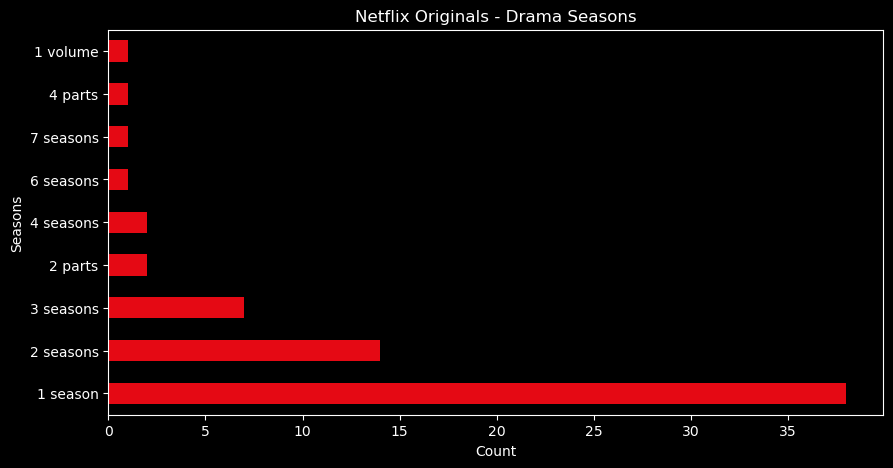

In [ ]:
#Plot Netflix Originals Drama Seasons
netflix_originals_drama_ds['Seasons_Only'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Netflix Originals - Drama Seasons')
plt.xlabel('Count')
plt.ylabel('Seasons')
plt.show()

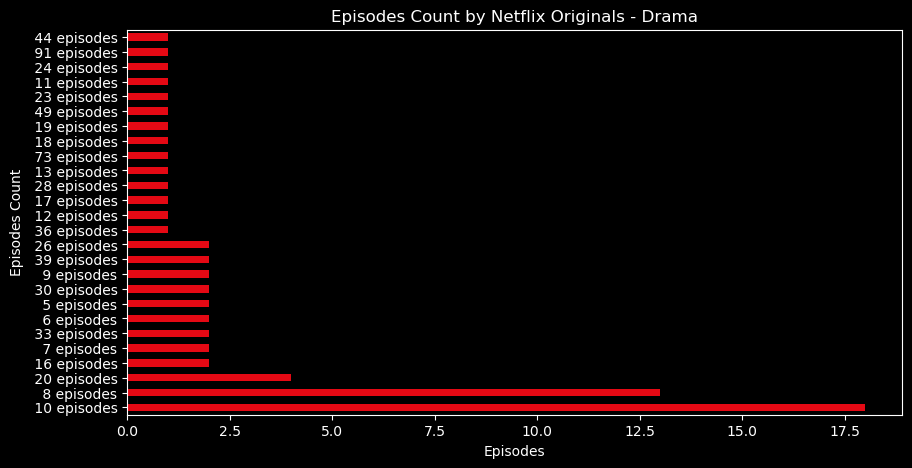

In [ ]:
#Plot Netflix Originals Drama Episodes
netflix_originals_drama_ds['Episodes'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Episodes')
plt.ylabel('Episodes Count')
plt.title('Episodes Count by Netflix Originals - Drama')
plt.show()


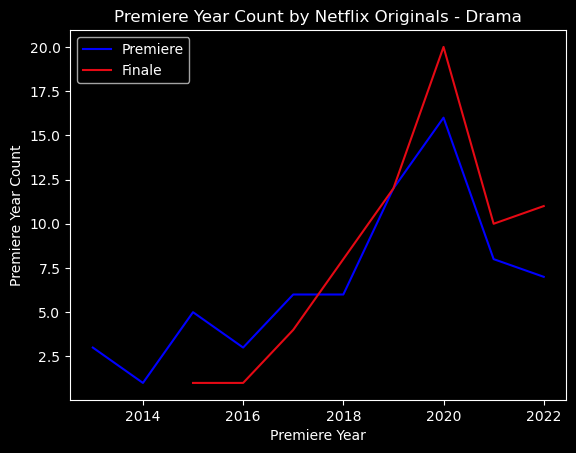

In [ ]:
#Plot time series of Premiere and Finale Year

#Color red for Premiere and Red for Finale
netflix_originals_drama_ds.groupby(netflix_originals_drama_ds['Premiere'].dt.year)['Premiere'].count().plot(color='blue', label='Premiere')
netflix_originals_drama_ds.groupby(netflix_originals_drama_ds['Finale'].dt.year)['Finale'].count().plot(color='#E50914', label='Finale')

#Show legend
plt.legend()

#Label the plot
plt.xlabel('Premiere Year')
plt.ylabel('Premiere Year Count')
plt.title('Premiere Year Count by Netflix Originals - Drama')
plt.show()

## Number of releases per year for each genre

Starting in 2016, which is the year that Netflix began its international expansion, the company produced more international movies than it did any other genre. This finding supports their strategy to appeal to customers in new markets with different preferences.

In [ ]:
netflix_ds2 = netflix_ds.listed_in.str.split(',').apply(pd.Series)
netflix_ds2.index = netflix_ds.set_index(["release_year"]).index
netflix_ds2 = netflix_ds2.stack().reset_index(["release_year"])
netflix_ds2.groupby(["release_year", 0])[0].count().sort_values(ascending=False)

## Rating distribution for movies and TV shows per countries

This question aims to explore the movie/TV show preference that differs between each country. For example, in the United States, most of Netflix's movies and TV shows fall under the category of TV-MA (Mature Audiece only), while in India, movies mostly falls under the TV-14 category.

In [ ]:
#Movie
#netflix_ds.groupby(["country", "rating"])["country"].count()

netflix_ds3 = netflix_ds.country.str.split(',').apply(pd.Series)
netflix_ds3.index = netflix_ds.set_index(['rating', 'type']).index
netflix_ds3 = netflix_ds3.stack().reset_index(['rating', 'type'])
netflix_ds3 = netflix_ds3.groupby([0, "type"])["rating"].count().sort_values(ascending=False)
#netflix_ds3[netflix_ds3["type"]== "Movie"]
#netflix_ds3.loc[movie]
#type(netflix_ds3)

## Which director has produced the most movies?

Netflix directors who have produced the most movies at the time this dataset was captured is: 

1. Rajiv Chilaka
2. Raul Campos, Jan Suter
2. Suhas Kadav
3. Marcus Raboy


In [ ]:
#Plot top 10 directors by movie and remove Not Listed
netflix_ds[(netflix_ds['type']=='Movie') & (netflix_ds['director']!='Not Listed')]['director'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling the plot 
#Remove decimal from x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Top 10 Directors by Movie')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

## Proportion of Movies and TV Shows


In [ ]:
#Plot proportion of movies and tv shows and color code by red and blue
netflix_ds['type'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', colors=['#E50914', '#564d4d'])
#Label the plot
plt.title('Proportion of Movies and TV Shows')
plt.show()

## Content added in Netflix over the years

In [ ]:
#Plot content added year by year
netflix_ds['date_added'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Year')
plt.ylabel('Content Added')
plt.title('Content Added Year by Year')
plt.show()

## Which days of the week is content added to Netflix the most?


Most contents are released on Fridays, followed by Thursdays and Wednesdays. Friday has been the traditional release day for content, which reflects the norm of high likeliness of viewers to spend their leisure time watching new movies/TV shows during the weekend. 

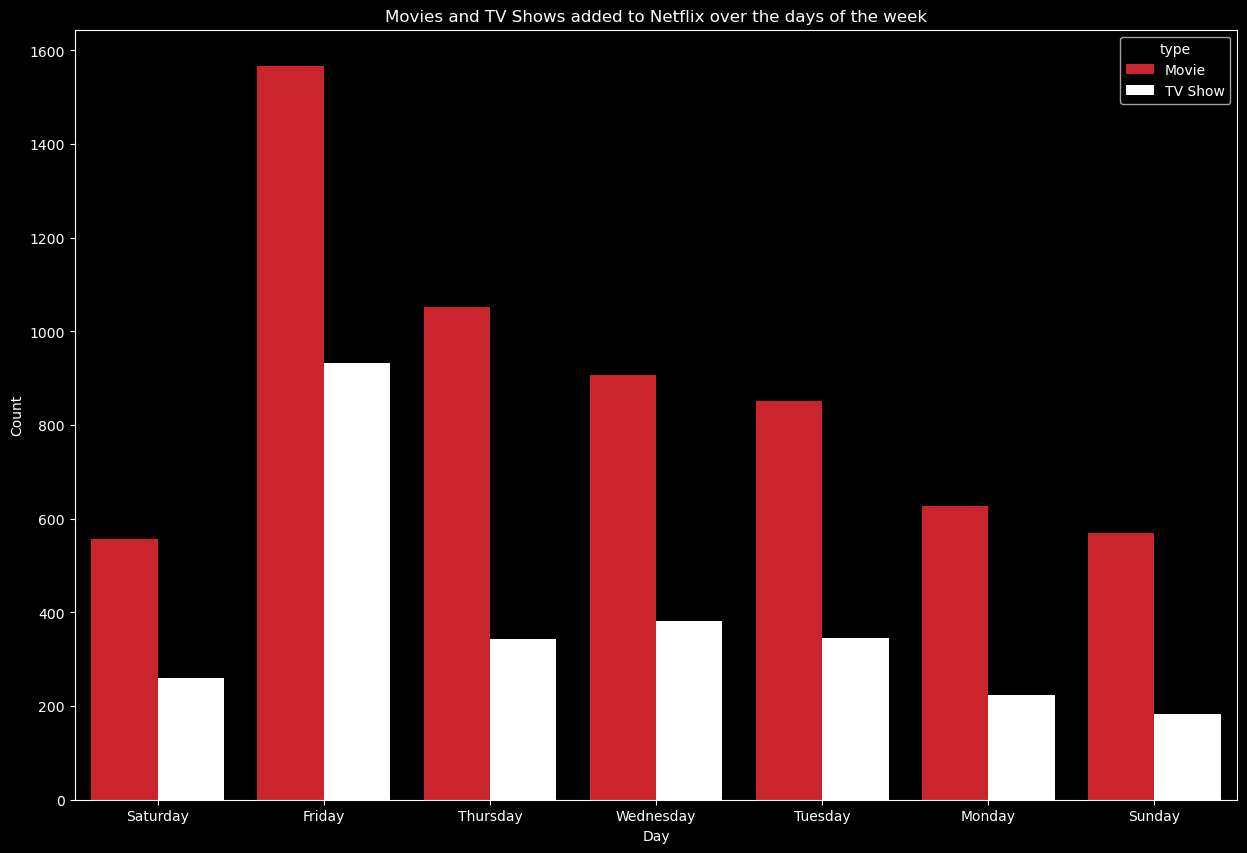

In [ ]:
#Plot and Hue by type the days of the week when content was added to Netflix
#Create a column of date added day of the week
netflix_ds['date_added_day'] = netflix_ds['date_added'].dt.day_name()
plt.figure(figsize=(15,10))
#Change color of plot to red and white
sns.countplot(x='date_added_day', hue='type', data=netflix_ds, palette=['#E50914', '#ffffff'])
plt.title('Movies and TV Shows added to Netflix over the days of the week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Observations**

Netflix shows a heavy preference in adding content on Friday's as opposed to Sunday's, which is the least preferred day for content additions in Netflix. In our research, this tracks well with industry practice.

We found it interesting to note that Sunday's were less preferred than Monday. Based on our research, in order to provide a convenient time for viewers to binge watch Netlix's content, Netflix follows a practice to add TV shows preferably on Fridays.

Moving further into the analysis, it is worthwhile to review the Genres which Netflix favors the most.

## Which country's content is added to Netflix the most?

In [ ]:
#Plot country that has most shows and movies on Netflix after the US
netflix_ds['country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

## Which country's TV Shows are the most popular on Netflix after the US?

In [ ]:
country_content = netflix_ds[(netflix_ds["type"] == "TV Show") & (netflix_ds["type"] != "Not Listed") & (netflix_ds["country"] != "Not Listed") & (netflix_ds["country"] != "United States")]
countrywise = country_content.groupby("country",as_index= False)["type"].count()
A = countrywise.sort_values("type",ascending = False).head(10)
print(A.head(10))

In [ ]:
#Plot country
A.plot(kind = "bar",x = "country",y = "type",figsize = (10,5),color = "#E50914")
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

## What has been the type of Genre that has been added the most to Netflix over the years?

We chose to split the Genres before and after 2016 because of Netflix's expansion to `130` countries in 2016. 

We wanted to see if the type of content added to Netflix changed after the expansion. If so, we also wanted to see if the change in the type of content added to Netflix post the expansion in 2016, was due to the change in its target audience.

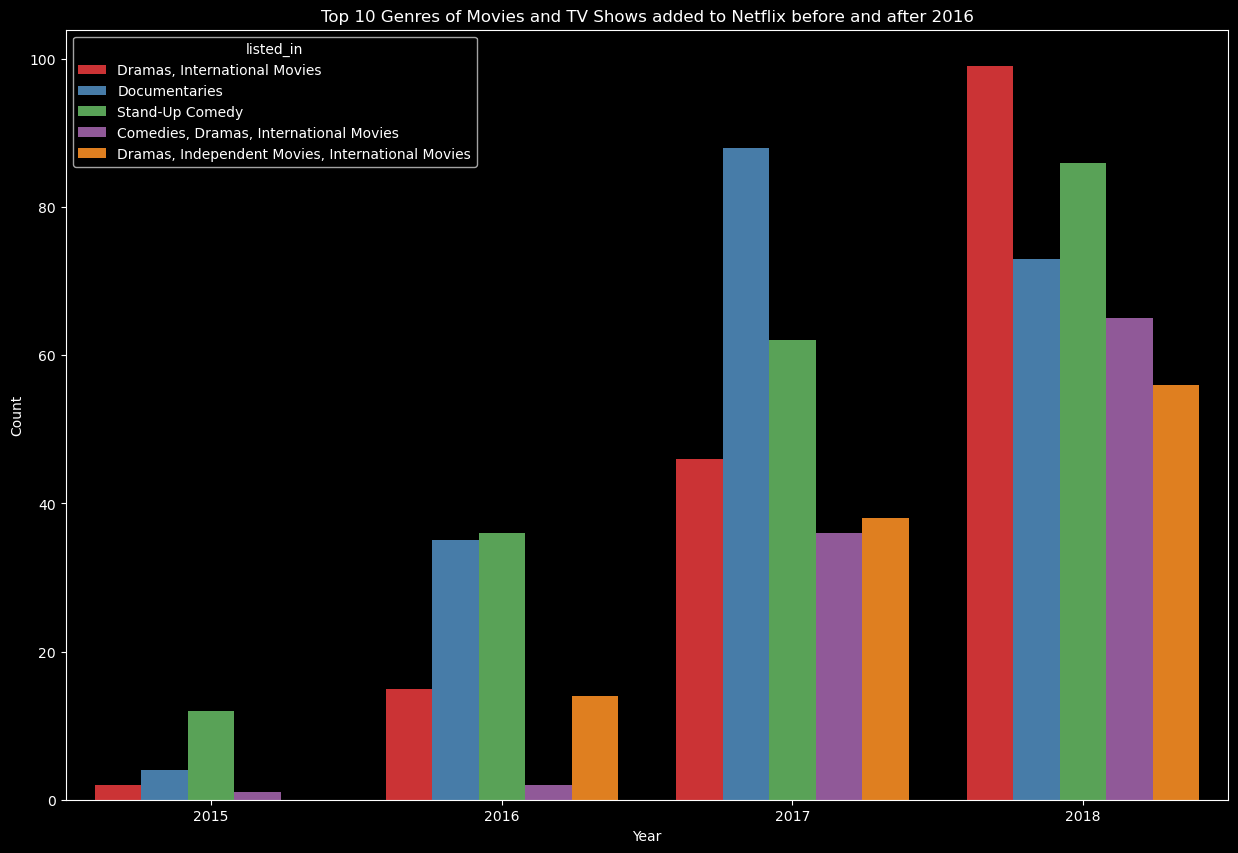

In [ ]:
#plot the top 10 genres of movies and tv shows before and after 2016
plt.figure(figsize=(15,10))
sns.countplot(x='date_added_year', hue='listed_in', data=netflix_ds, palette='Set1', order=[2015,2016,2017,2018], hue_order=netflix_ds['listed_in'].value_counts().index[:5])
plt.title('Top 10 Genres of Movies and TV Shows added to Netflix before and after 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observation**

Except for the known fact that Netflix did not provide much of the content before `2016`, we do notice the interesting increase in addition of `Documentaries`, and `Dramas, International Movies`. We suspect that this is a part of Netflix's strategy of appealing to new international audiences.

## What is the overall distrubution of Genres in the Netflix library?

In [ ]:
#Plotly tree map of Genres
fig = px.treemap(netflix_ds, path=['listed_in'], title='Top 10 Genres of Movies before 2016')
fig.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig.show()

## Wordcloud of Descriptions of Movies and TV Shows



In [ ]:
!pip install wordcloud

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
#Take URL of the image and create a mask for the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
url = "https://ik.imagekit.io/taw2awb5ntf/wp-content/uploads/2021/01/netflix-logo-1-2048x1152.png"
response = requests.get(url)
img = Image.open(urllib.request.urlopen(url))
mask = np.array(img)

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val


In [ ]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [ ]:
description = " ".join(description for description in netflix_ds.description)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=42, background_color='black', colormap='Reds', collocations=False, stopwords = STOPWORDS, mask=maskable_image).generate(description)
def plot_cloud(wordcloud):
    # Adjust the figure size
    plt.figure(figsize=(40, 30))
    # Display the word cloud
    plt.imshow(wordcloud) 
    # Remove the axis details and names
    plt.axis("off");
plot_cloud(wordcloud)
#wordcloud.to_file("netflix-wordcloud.png")

## Proportion of Movies and TV shows ##

In [ ]:
# Proportion of Movies and TV Shows
#import seaborn as sns
sns.countplot( x = netflix_ds['type'], palette=['#E50914',"#ffffff"])
plt.title('Proportion of Movies and TV shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

## Customising data added column ##

In [ ]:
#converting date_added col into datetime format

import pandas as pd
#Clean Date Added - Manual Validation 
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'], infer_datetime_format =True, errors = 'coerce')
netflix_ds

In [ ]:
#extracting year from date_added
netflix_ds['date_added1'] = netflix_ds['date_added'].dt.strftime('%Y')
netflix_ds


In [ ]:
netflix_ds['date_added1']=pd.to_numeric(netflix_ds['date_added1'],errors='ignore')
netflix_ds['date_added1'].astype("Int64")

In [ ]:
## ERROR  .....|||||||||||||||||||||||||||
import numpy as np
netflix_ds['release_year'] = np.array('release_year')
netflix_ds['date_added1'] = np.array('date_added1')
netflix_ds['year_diff'] = netflix_ds['date_added1'] - netflix_ds['release_year']
netflix_ds['year_diff']

## Trend of content rise over the years ##



In [ ]:
yearly_release = netflix_ds.groupby('date_added1', as_index = False)['title'].count()
a = yearly_release.sort_values('date_added1')
a

In [ ]:
# Overall content additions

import matplotlib.pyplot as plt
plt.bar(a['date_added1'], a['title'], color ='#E50914')
plt.axvline(2016, color  ="w", linestyle = ":", alpha =1)
plt.title('Netflix Yearly Content Additions')
plt.xlabel('Year Added')
plt.ylabel('No.of Content added')
plt.xlim([2010,2021])
plt.ylim([0,2200])
plt.show()

## Bifurcation of Movie and TV Shows increase over the years ##

In [ ]:
#Calculate only years from date_added
netflix_ds['date_added_year'] = netflix_ds['date_added'].dt.year

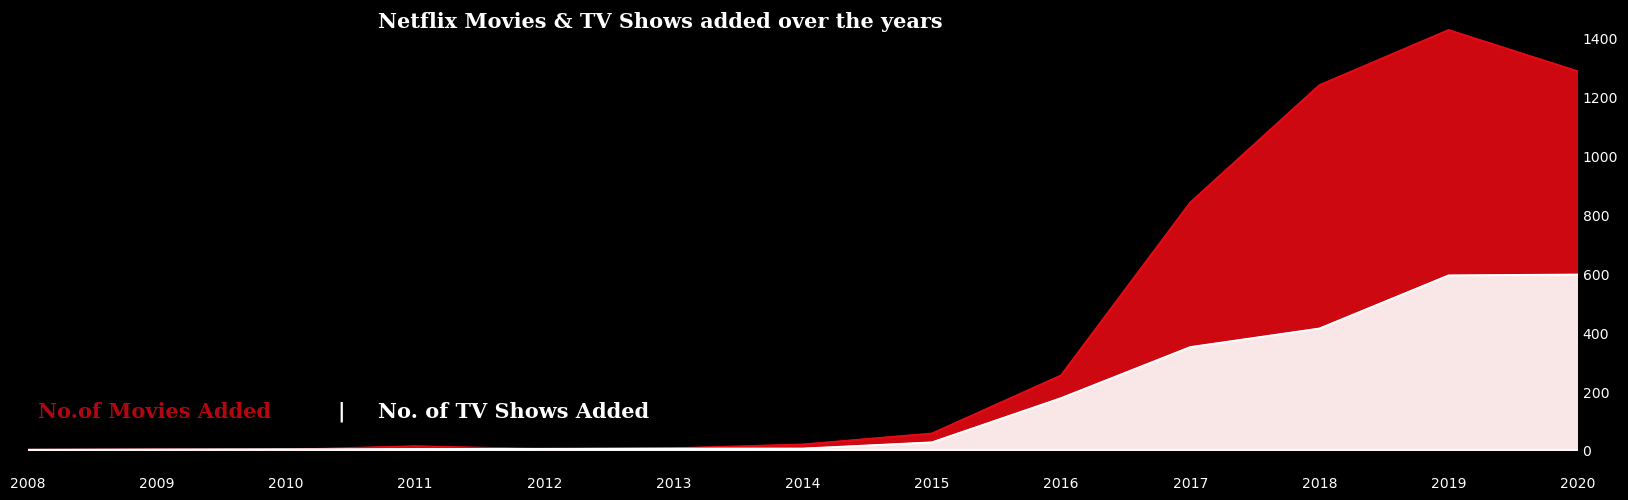

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')

# Movies and TV shows added over the years

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
color = ["#E50914", "#ffffff"]

for i, mtv in enumerate(netflix_ds['type'].value_counts().index):
    mtv_rel = netflix_ds[netflix_ds['type']==mtv]['date_added_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'white', linewidth = 1.4, alpha = .9)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.30, 0.85, 'Netflix Movies & TV Shows added over the years', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13,0.2,"No.of Movies Added", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.28,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.3,0.2,"No. of TV Shows Added", fontweight="bold", fontfamily='serif', fontsize=15, color='#FFFFFF')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Observations**

We clearly see a sudden increase in the addition of content by Netflix after the year`2016`. Especially with `2019` being the year with most added Movies and `2020` being the year with most amount of TV Shows added.

We also record that the growth in the addition of Movies is much higher than growth in the addition of TV shows post `2016`.

A part of this boom is explained by their new initiative, which was a huge undertaking to expand their services to `130` new countries.

In [ ]:
#Verifying through code the findings to ensure visualizations are correct
netflix_ds[netflix_ds['type'] == 'Movie']['date_added_year'].value_counts().head(1)

2019.0    1424
Name: date_added_year, dtype: int64

In [ ]:
netflix_ds[netflix_ds['type'] == 'TV Show']['date_added_year'].value_counts().head(1)

2020.0    595
Name: date_added_year, dtype: int64


In addition to just the content added, it could be interesting to see the top durations of both Movies and TV Shows addded by Netflix

##**Before and after 2016 content trend**##

In [ ]:
#before 2016
before_2016 = netflix_ds[(netflix_ds.date_added <= '2016')]['title'].count()
before_2016

In [ ]:
#after 2016
after_2016 = netflix_ds[(netflix_ds.date_added > '2016')]['title'].count()
after_2016

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Create dataset
Values = [159, 8550]
bars = ('Before 2016', 'After 2016')
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, Values, color = "#E50914")
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.ylabel("Content Count")
plt.title("Before and After 2016 Content Trend")
 
# Show graphic
plt.show()

# **Phase 2**

## FAANG Trend

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# will lead to static images of your plot embedded in the notebook
%matplotlib inline 

In [ ]:
!pip install yfinance -q

     |████████████████████████████████| 62 kB 1.4 MB/s 


In [ ]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'GOOGL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
googl = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
googl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,15.689439,15.753504,15.621622,15.684434,78169752,0,0.0
2010-01-05 00:00:00-05:00,15.695195,15.711712,15.554054,15.615365,120067812,0,0.0
2010-01-06 00:00:00-05:00,15.662162,15.662162,15.174174,15.221722,158988852,0,0.0
2010-01-07 00:00:00-05:00,15.250250,15.265265,14.831081,14.867367,256315428,0,0.0
2010-01-08 00:00:00-05:00,14.814815,15.096346,14.742492,15.065566,188783028,0,0.0
...,...,...,...,...,...,...,...
2021-02-01 00:00:00-05:00,92.229500,95.777000,92.229500,94.653503,40252000,0,0.0
2021-02-02 00:00:00-05:00,95.656502,97.468498,95.318497,95.956001,66332000,0,0.0
2021-02-03 00:00:00-05:00,103.280502,105.331001,100.677498,102.944000,97882000,0,0.0


In [ ]:
googl_close = googl['Close']

In [ ]:
#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
aapl = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
aapl_close = aapl['Close']

In [ ]:
#define the ticker symbol
tickerSymbol = 'AMZN'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
amzn = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
amzn_close = amzn['Close']

In [ ]:
tickerSymbol = 'META'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
meta = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
meta_close = meta['Close']

In [ ]:
tickerSymbol = 'NFLX'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
nflx = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
nflx_close = nflx['Close']

##FAANG - Netflix comparison stock price

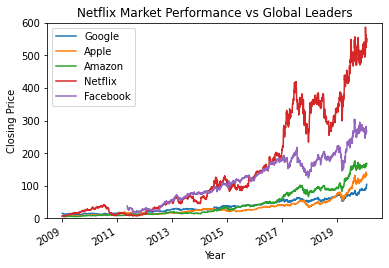

In [ ]:
googl_close.plot()
aapl_close.plot()
amzn_close.plot()
nflx_close.plot()
meta_close.plot()

location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["Google", "Apple", "Amazon","Netflix", "Facebook"], loc=0, frameon=legend_drawn_flag)
plt.ylim([0,600])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Netflix Market Performance vs Global Leaders")
plt.show()


##Netflix trend

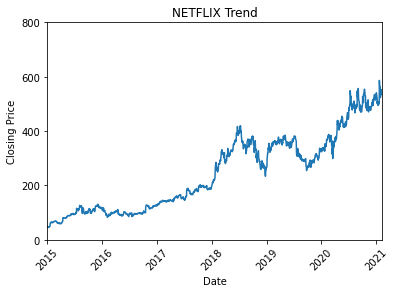

In [ ]:
from datetime import date

ax = plt.axes()
ax.plot(nflx_close)
ax.set(xlim=(date(year=2015, month=1, day=1), date(year=2021, month=2, day=6)), ylim=(0, 800),
       xlabel='Date', ylabel='Closing Price',
       title='NETFLIX Trend')
plt.xticks(rotation=45)
plt.yticks([0, 200, 400, 600, 800]);

## Disney+ (2019), HBO Max, Prime Video,NETFLIX - Subscriber Count QoQ Revenue QoQ

## Sankey Chart - Netflix Expenditure Sankey Diagram

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 40,
      line = dict(color = "red", width = 4),
      label = ["Total Revenue 2021", "Cost of Revenue ($17.3B)", "Licensed Content Amortization ($8.1B)", "Gross Profit ($12.4B)", "Marketing ($2.5B)", "Tech & Development ($2.3B)", "General & Admin ($1.4B)", "Operating Profit ($6.2B)", "Produced Content Amortization ($4.1B)", "Other Content Delivery Costs ($5.1B)"],
      color = "black"
    ),
    link = dict(
      source = [0, 1, 0, 3, 3, 3, 3, 1, 1], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1, 2, 3, 4, 5, 6, 7, 8, 9],
      value = [17.3, 8.1, 12.4, 2.5, 2.3, 1.4, 6.2, 4.1, 5.1]
  ))])

fig.update_layout(title_text="Netflix Expenditure Sankey Diagram", font_size=15, font_color = "Black")
fig.show()

# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**

Netflix clearly had a big shift in `2016` with their expansion to over `130` countries. In this project, we analyzed multiple datasets to understand Netflix's shift in content-adding practicies w.r.t genres, durations, type and compared it to its competitors such as Disney+, Hulu etc. , which will be shared in the upcoming main project submission.

# **<span id="References" style="color:#023e8a;">References</span>**

*  https://pandas.pydata.org/docs/user_guide/basics.html#basics-object-conversion
*  https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
* https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
* https://www.holisticseo.digital/python-seo/word-cloud/
*  https://www.dataquest.io/blog/making-538-plots/
*  https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
*  https://www.kaggle.com/general/51898
*  https://www.imdb.com/
* https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
* https://s22.q4cdn.com/959853165/files/doc_financials/2021/q4/da27d24b-9358-4b5c-a424-6da061d91836.pdf

